# PIRvision_FoG_presence_detection

# Exploratory Data Analysis

In [115]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt

In [116]:

zip_path = "data/pirvision_fog_presence_detection.zip"
extract_dir = "unzipped_data"

# Unzip into a folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
print(os.listdir(extract_dir))

['pirvision_office_dataset2.csv', 'pirvision_office_dataset1.csv']


In [117]:
df1 = pd.read_csv("data/unzipped_data/pirvision_office_dataset1.csv")


In [118]:
df2 = pd.read_csv("data/unzipped_data/pirvision_office_dataset2.csv")


In [119]:
print("Shapes:", df1.shape, df2.shape)


print("Data identical:", df1.equals(df2))


Shapes: (7651, 59) (7651, 59)
Data identical: True


In [120]:
df2.head()

,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
0,2024-08-08,19:19:56,0,86,10269,10721,11156,11170,10931,10671,...,11178,11197,11161,11096,10957,10839,10735,10590,10411,10329
1,2024-08-08,19:20:12,1,86,10364,10907,11299,11238,10867,10535,...,11122,11145,11136,11108,11041,10824,10645,10493,10398,10357
2,2024-08-08,19:20:28,0,86,10329,10793,11197,11242,11052,10658,...,11168,11204,11162,11109,11007,10867,10700,10533,10427,10265
3,2024-08-08,19:20:44,0,86,10169,10425,10822,11133,11136,10834,...,11116,11273,11186,10984,10910,10807,10714,10651,10562,10463
4,2024-08-08,19:21:00,0,86,10320,10667,11104,11234,11129,10814,...,11006,11257,11370,11173,10924,10816,10754,10588,10428,10407


In [121]:
print(df2.columns.tolist())

['Date', 'Time', 'Label', 'Temperature_F', 'PIR_1', 'PIR_2', 'PIR_3', 'PIR_4', 'PIR_5', 'PIR_6', 'PIR_7', 'PIR_8', 'PIR_9', 'PIR_10', 'PIR_11', 'PIR_12', 'PIR_13', 'PIR_14', 'PIR_15', 'PIR_16', 'PIR_17', 'PIR_18', 'PIR_19', 'PIR_20', 'PIR_21', 'PIR_22', 'PIR_23', 'PIR_24', 'PIR_25', 'PIR_26', 'PIR_27', 'PIR_28', 'PIR_29', 'PIR_30', 'PIR_31', 'PIR_32', 'PIR_33', 'PIR_34', 'PIR_35', 'PIR_36', 'PIR_37', 'PIR_38', 'PIR_39', 'PIR_40', 'PIR_41', 'PIR_42', 'PIR_43', 'PIR_44', 'PIR_45', 'PIR_46', 'PIR_47', 'PIR_48', 'PIR_49', 'PIR_50', 'PIR_51', 'PIR_52', 'PIR_53', 'PIR_54', 'PIR_55']


In [122]:
print(df2.index)

RangeIndex(start=0, stop=7651, step=1)


In [123]:
df2["Timestamp"] = pd.to_datetime(df2["Date"] + " " + df2["Time"])
df2 = df2.set_index("Timestamp")


In [124]:
print(df2.shape)
print(df2.isna().sum())
print(df2["Label"].value_counts(normalize=True))


(7651, 59)
Date             0
Time             0
Label            0
Temperature_F    0
PIR_1            0
PIR_2            0
PIR_3            0
PIR_4            0
PIR_5            0
PIR_6            0
PIR_7            0
PIR_8            0
PIR_9            0
PIR_10           0
PIR_11           0
PIR_12           0
PIR_13           0
PIR_14           0
PIR_15           0
PIR_16           0
PIR_17           0
PIR_18           0
PIR_19           0
PIR_20           0
PIR_21           0
PIR_22           0
PIR_23           0
PIR_24           0
PIR_25           0
PIR_26           0
PIR_27           0
PIR_28           0
PIR_29           0
PIR_30           0
PIR_31           0
PIR_32           0
PIR_33           0
PIR_34           0
PIR_35           0
PIR_36           0
PIR_37           0
PIR_38           0
PIR_39           0
PIR_40           0
PIR_41           0
PIR_42           0
PIR_43           0
PIR_44           0
PIR_45           0
PIR_46           0
PIR_47           0
PIR_48           0
P

<AxesSubplot:>

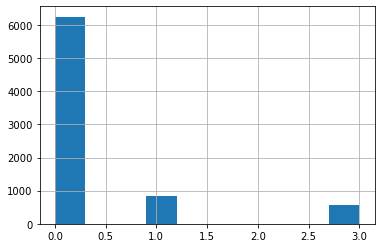

In [125]:
df2["Label"].hist()

<AxesSubplot:>

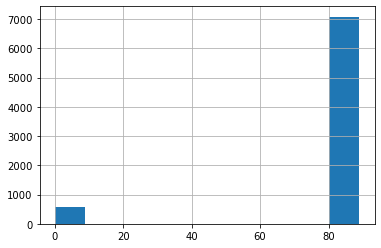

In [126]:
df2["Temperature_F"].hist()

In [127]:
df2["Label"].value_counts()



0    6247
1     833
3     571
Name: Label, dtype: int64

array([[<AxesSubplot:title={'center':'PIR_1'}>,
        <AxesSubplot:title={'center':'PIR_38'}>],
       [<AxesSubplot:title={'center':'PIR_38'}>, <AxesSubplot:>]],
      dtype=object)

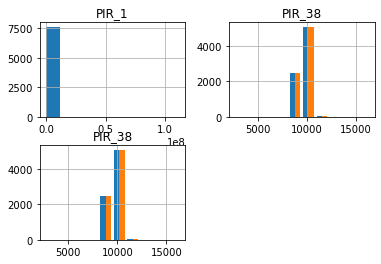

In [128]:
df2[['PIR_1', "PIR_38", "PIR_38"]].hist()

<AxesSubplot:xlabel='Label', ylabel='PIR_13'>

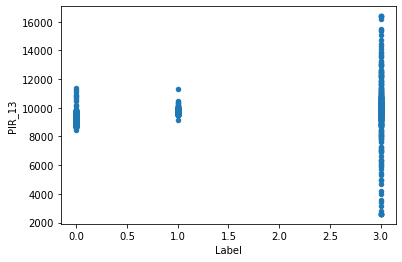

In [129]:
df2.plot(kind="scatter", x='Label', y="PIR_13")

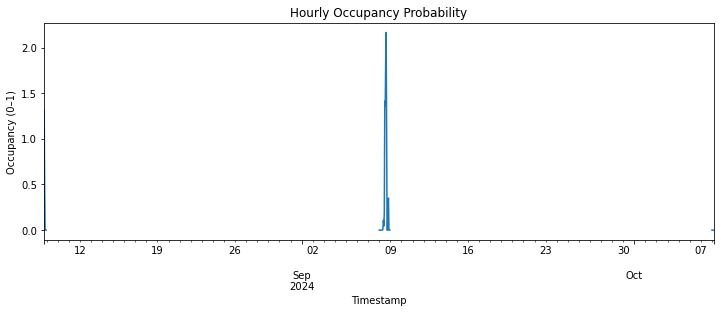

In [130]:
#overall occupancy trend


df2["Label"].resample("H").mean().plot(figsize=(12,4))
plt.title("Hourly Occupancy Probability")
plt.ylabel("Occupancy (0–1)")
plt.show()


In [131]:
df2["Label"].resample("H").mean()

Timestamp
2024-08-08 19:00:00    1.312849
2024-08-08 20:00:00    0.444444
2024-08-08 21:00:00    0.000000
2024-08-08 22:00:00    0.000000
2024-08-08 23:00:00    0.000000
                         ...   
2024-10-08 00:00:00    0.000000
2024-10-08 01:00:00    0.000000
2024-10-08 02:00:00    0.000000
2024-10-08 03:00:00    0.000000
2024-10-08 04:00:00    0.000000
Freq: H, Name: Label, Length: 1450, dtype: float64

In [132]:
df2 = df2.sort_index()


In [133]:
occ_resampled = df2["Label"].resample("5T").mean()
print(occ_resampled.isna().sum())   # how many NaNs?
print(occ_resampled.head(20))       # first few values


16992
Timestamp
2024-08-08 19:15:00    0.000000
2024-08-08 19:20:00    0.055556
2024-08-08 19:25:00    0.000000
2024-08-08 19:30:00    0.000000
2024-08-08 19:35:00    1.500000
2024-08-08 19:40:00    2.760000
2024-08-08 19:45:00    1.000000
2024-08-08 19:50:00    1.000000
2024-08-08 19:55:00    2.866667
2024-08-08 20:00:00    2.791667
2024-08-08 20:05:00    1.636364
2024-08-08 20:10:00    0.000000
2024-08-08 20:15:00    0.000000
2024-08-08 20:20:00    0.000000
2024-08-08 20:25:00    0.000000
2024-08-08 20:30:00    0.000000
2024-08-08 20:35:00    0.000000
2024-08-08 20:40:00    0.055556
2024-08-08 20:45:00    0.000000
2024-08-08 20:50:00    0.000000
Freq: 5T, Name: Label, dtype: float64


In [134]:
print(df2["Label"].unique()[:20])


[0 1 3]


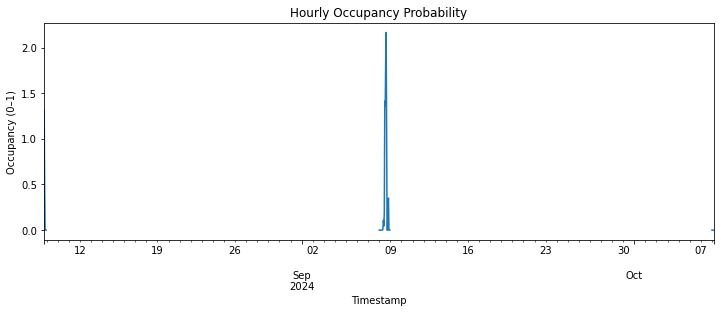

In [135]:
import matplotlib.pyplot as plt

df2["Label"].resample("H").mean().plot(figsize=(12,4))
plt.title("Hourly Occupancy Probability")
plt.ylabel("Occupancy (0–1)")
plt.show()


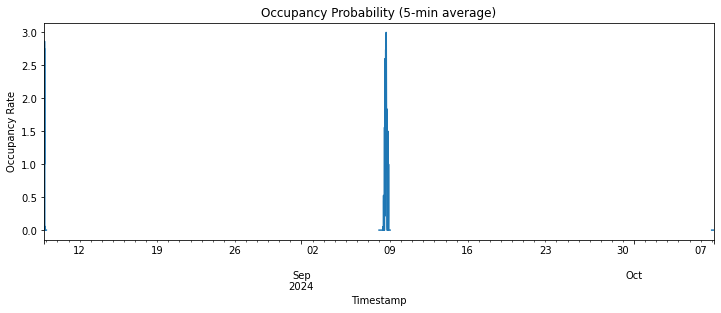

In [136]:
df2["Label"].resample("5T").mean().plot(figsize=(12,4))
plt.title("Occupancy Probability (5-min average)")
plt.ylabel("Occupancy Rate")
plt.show()


In [137]:
print(df2["Label"] == df2["Label"].astype(int))


Timestamp
2024-08-08 19:19:56    True
2024-08-08 19:20:12    True
2024-08-08 19:20:28    True
2024-08-08 19:20:44    True
2024-08-08 19:21:00    True
                       ... 
2024-10-08 04:34:17    True
2024-10-08 04:34:33    True
2024-10-08 04:34:49    True
2024-10-08 04:35:05    True
2024-10-08 04:35:21    True
Name: Label, Length: 7651, dtype: bool


In [138]:
occ_resampled = df2["Label"].resample("5T").mean()
print(occ_resampled.head(5))


Timestamp
2024-08-08 19:15:00    0.000000
2024-08-08 19:20:00    0.055556
2024-08-08 19:25:00    0.000000
2024-08-08 19:30:00    0.000000
2024-08-08 19:35:00    1.500000
Freq: 5T, Name: Label, dtype: float64


In [139]:
print(df2["Label"].unique()[:20])
print(df2[["Date","Time","Label"]].head(10))


[0 1 3]
                           Date      Time  Label
Timestamp                                       
2024-08-08 19:19:56  2024-08-08  19:19:56      0
2024-08-08 19:20:12  2024-08-08  19:20:12      1
2024-08-08 19:20:28  2024-08-08  19:20:28      0
2024-08-08 19:20:44  2024-08-08  19:20:44      0
2024-08-08 19:21:00  2024-08-08  19:21:00      0
2024-08-08 19:21:16  2024-08-08  19:21:16      0
2024-08-08 19:21:32  2024-08-08  19:21:32      0
2024-08-08 19:21:48  2024-08-08  19:21:48      0
2024-08-08 19:22:04  2024-08-08  19:22:04      0
2024-08-08 19:22:20  2024-08-08  19:22:20      0


In [140]:
print(df2[["Date","Time","Label"]].head(10))


                           Date      Time  Label
Timestamp                                       
2024-08-08 19:19:56  2024-08-08  19:19:56      0
2024-08-08 19:20:12  2024-08-08  19:20:12      1
2024-08-08 19:20:28  2024-08-08  19:20:28      0
2024-08-08 19:20:44  2024-08-08  19:20:44      0
2024-08-08 19:21:00  2024-08-08  19:21:00      0
2024-08-08 19:21:16  2024-08-08  19:21:16      0
2024-08-08 19:21:32  2024-08-08  19:21:32      0
2024-08-08 19:21:48  2024-08-08  19:21:48      0
2024-08-08 19:22:04  2024-08-08  19:22:04      0
2024-08-08 19:22:20  2024-08-08  19:22:20      0


In [141]:
print(df2.index.min(), "to", df2.index.max())
print("Total rows:", len(df2))


2024-08-08 19:19:56 to 2024-10-08 04:35:21
Total rows: 7651


In [142]:
NOTE: Date range: ~ 2 months (Aug 8 → Oct 8).

    Total rows: 7,651 observations.

    Expected rows if continuous logging (4s resolution):

    2 month*30 days*24 hours * 60 min * 15 (4s per min)≈648,000 2 months×30 days×24 hours×60 min×15 (4s per min)≈648,000

    We've only have ~1% of expected rows.
    
    
What this means:

The data was not logged continuously.

Likely the sensor was only recording when triggered (movement detected), or logging was scheduled/filtered.

That’s why resampling created lots of NaNs (16,992 empty bins) — there are big gaps.

SyntaxError: invalid syntax (2759271639.py, line 1)

In [ ]:
#Checking for gaps in the data

df2.index.to_series().diff().value_counts().head(10)


In [ ]:
NOTE: The time gaps between consecutive rows:

    The most common gap = 16 seconds (6,922 times)

    Then 17s (214), 15s (199), 6s (145), etc.
    
The dataset is not truly 4-second resolution, even though the documentation says “4 seconds per observation.”

Instead, it looks like the logger aggregated multiple 4-second windows or only wrote rows every ~15–17 seconds.

The small variations (15, 16, 17s) suggest either:

        Buffering delays in the logger, or

        Dropped packets if this was streamed.

So the effective resolution = ~16 seconds per sample, not 4s.

In [143]:
What this means for EDA

Your total rows (7,651) now make sense:

2 months ≈ 60 × 24 × 3600 / 16 ≈ 324, 000 expected if continuous 

But we only have 7.6k rows -> still sparse.

When resampling (e.g., to 5 min), we’ll see NaNs because there are gaps larger than 5 minutes.

We should not assume continuous occupancy data. Instead, treat it as event-based, irregular samples.

SyntaxError: invalid syntax (333174724.py, line 1)

In [144]:
#Check for gaps larger than 1 hour (to see if whole days are missing)
long_gaps = df2.index.to_series().diff().sort_values(ascending=False).head(10)
print(long_gaps)


Timestamp
2024-09-08 00:00:02   30 days 00:00:16
2024-10-08 00:00:02   29 days 00:00:16
2024-09-08 10:35:12    0 days 00:00:32
2024-09-08 22:19:44    0 days 00:00:32
2024-08-08 22:50:40    0 days 00:00:32
2024-09-08 21:15:43    0 days 00:00:32
2024-09-08 09:30:59    0 days 00:00:20
2024-08-08 21:46:26    0 days 00:00:19
2024-09-08 20:11:28    0 days 00:00:19
2024-08-08 20:42:23    0 days 00:00:18
Name: Timestamp, dtype: timedelta64[ns]


In [145]:
NOTE:
    Your dataset actually consists of two main blocks of data:

    Aug 8 -> Sep 8

    Sep 8 -> Oct 8

    In between, there’s a huge gap (no data at all).

    That’s why when you resample, you see tons of NaNs -> because whole days are missing.

SyntaxError: invalid syntax (1622983343.py, line 1)

In [146]:
#Segment the dataset
#Split into continuous blocks (Aug → Sep, Sep → Oct) and analyze separately:
blocks = (df2.index.to_series().diff() > "1H").cumsum()
df_blocks = df2.groupby(blocks)


<AxesSubplot:xlabel='Timestamp'>

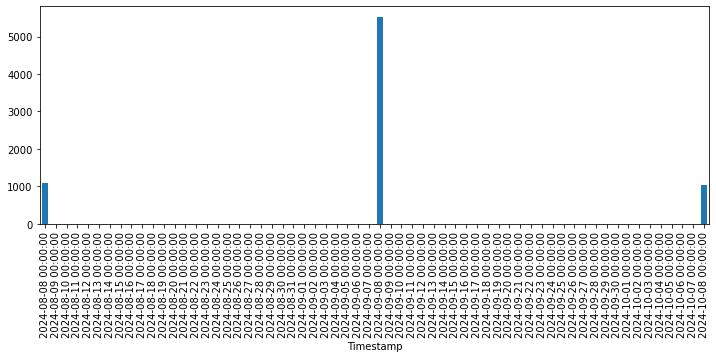

In [147]:
df2.resample("D")["Label"].count().plot(kind="bar", figsize=(12,4))


In [148]:
df1["Timestamp"] = pd.to_datetime(df1["Date"] + " " + df1["Time"])
df1 = df1.set_index("Timestamp")

<AxesSubplot:xlabel='Timestamp'>

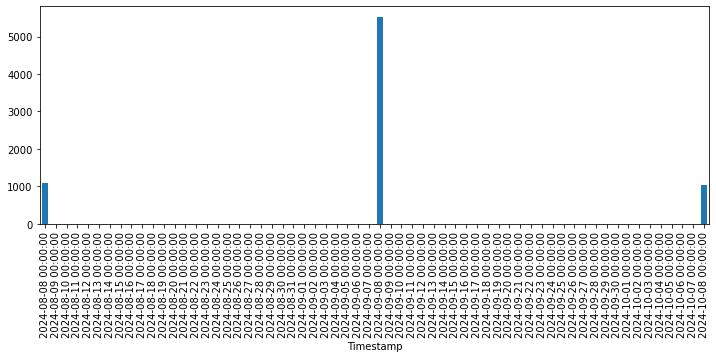

In [149]:
df1.resample("D")["Label"].count().plot(kind="bar", figsize=(12,4))

In [150]:
NOTE:
    The logger only has data on those days.

    Everything in between (Aug 9 → Sep 7, Sep 9 → Oct 7) is just empty — no rows at all.

    That’s why the resample is producing 16,992 NaNs → pandas is filling every missing 5-minute slot in those 2 big empty months.

     Why this happens

    The data logger seems to record for one day, stop for ~30 days, then record again.

    So in reality, we don’t have a continuous 2-month dataset, but three isolated single-day experiments.

SyntaxError: invalid syntax (1314662629.py, line 1)

In [151]:
# Find gaps larger than, say, 1 hour
gaps = df2.index.to_series().diff() > pd.Timedelta("1H")

# Assign block IDs
df2["block_id"] = gaps.cumsum()

#  groupping by block
for block, data in df2.groupby("block_id"):
    print(f"Block {block}: {data.index.min()} → {data.index.max()} ({len(data)} rows)")


Block 0: 2024-08-08 19:19:56 → 2024-08-08 23:59:46 (1086 rows)
Block 1: 2024-09-08 00:00:02 → 2024-09-08 23:59:46 (5532 rows)
Block 2: 2024-10-08 00:00:02 → 2024-10-08 04:35:21 (1033 rows)


In [152]:
block0 = df2[df2["block_id"] == 0]   # Aug 8th
block1 = df2[df2["block_id"] == 1]   # Sep 8th
block2 = df2[df2["block_id"] == 2]   # Oct 8th


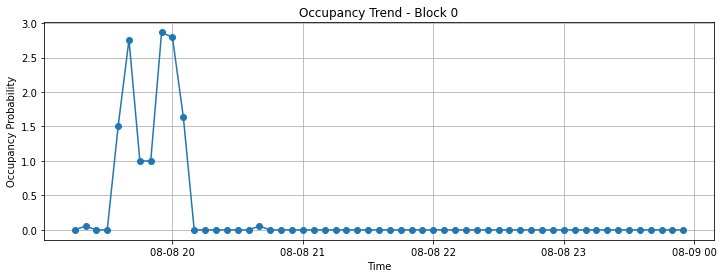

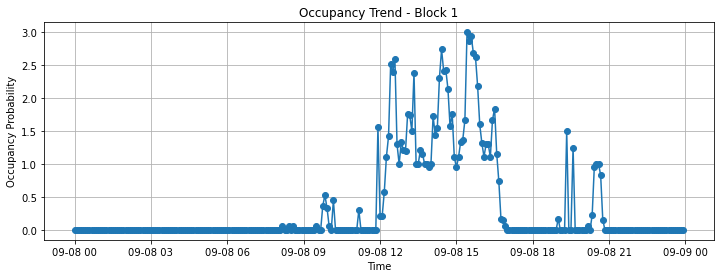

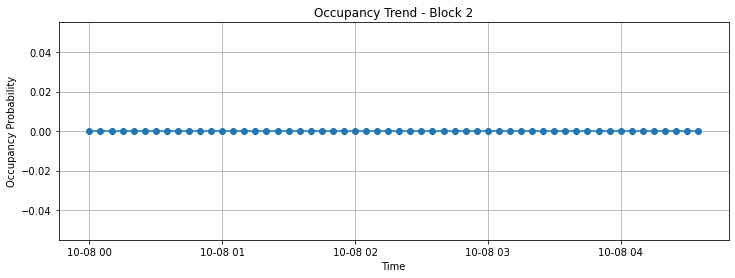

In [153]:
for i, block in enumerate([block0, block1, block2]):
    occ_resampled = block["Label"].resample("5T").mean()

    plt.figure(figsize=(12, 4))
    plt.plot(occ_resampled.index, occ_resampled.values, marker="o", linestyle="-")
    plt.title(f"Occupancy Trend - Block {i}")
    plt.ylabel("Occupancy Probability")
    plt.xlabel("Time")
    plt.grid(True)
    plt.show()



In [154]:
for i, block in enumerate([block0, block1, block2]):
    print(f"\n--- Block {i} ---")
    print("Start:", block.index.min())
    print("End:  ", block.index.max())
    print("Rows: ", len(block))
    print("Occupancy counts:\n", block["Label"].value_counts())



--- Block 0 ---
Start: 2024-08-08 19:19:56
End:   2024-08-08 23:59:46
Rows:  1086
Occupancy counts:
 0    967
3    110
1      9
Name: Label, dtype: int64

--- Block 1 ---
Start: 2024-09-08 00:00:02
End:   2024-09-08 23:59:46
Rows:  5532
Occupancy counts:
 0    4247
1     824
3     461
Name: Label, dtype: int64

--- Block 2 ---
Start: 2024-10-08 00:00:02
End:   2024-10-08 04:35:21
Rows:  1033
Occupancy counts:
 0    1033
Name: Label, dtype: int64


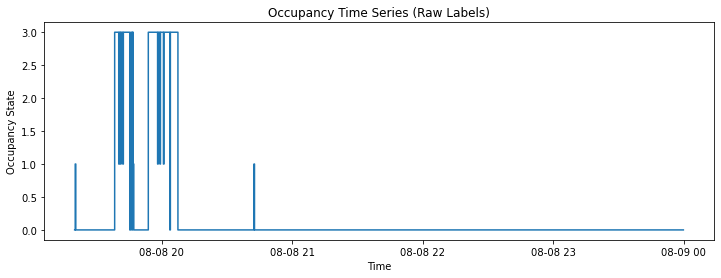

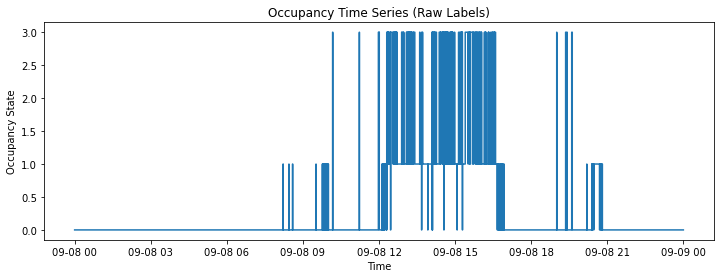

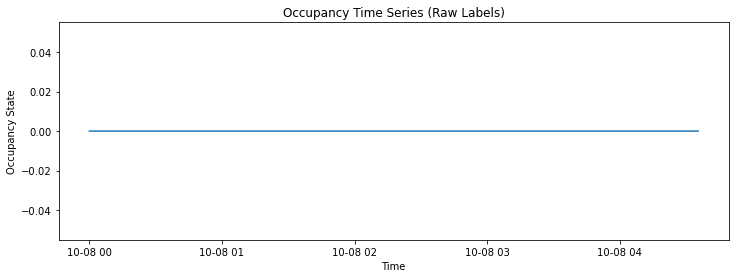

In [155]:
for i, block in enumerate([block0, block1, block2]):
    occ_resampled = block["Label"].resample("5T").mean()
    
    plt.figure(figsize=(12,4))
    plt.plot(block["Label"], drawstyle="steps-post")
    plt.title("Occupancy Time Series (Raw Labels)")
    plt.ylabel("Occupancy State")
    plt.xlabel("Time")
    plt.show()

In [156]:
blocks = {
    0: df2[df2["block_id"] == 0],  # Aug 8th
    1: df2[df2["block_id"] == 1],  # Sep 8th
    2: df2[df2["block_id"] == 2],  # Oct 8th
}

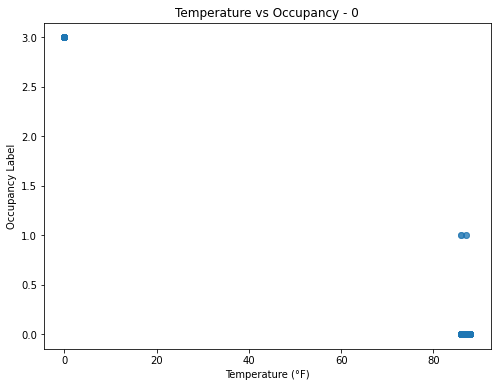

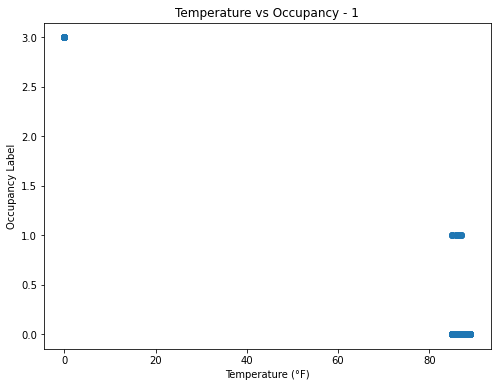

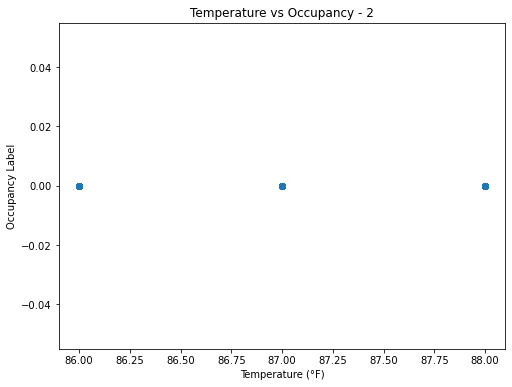

In [157]:



for name, block in blocks.items():
    plt.figure(figsize=(8,6))
    plt.scatter(block["Temperature_F"], block["Label"], alpha=0.3)
    plt.xlabel("Temperature (°F)")
    plt.ylabel("Occupancy Label")
    plt.title(f"Temperature vs Occupancy - {name}")
    plt.show()



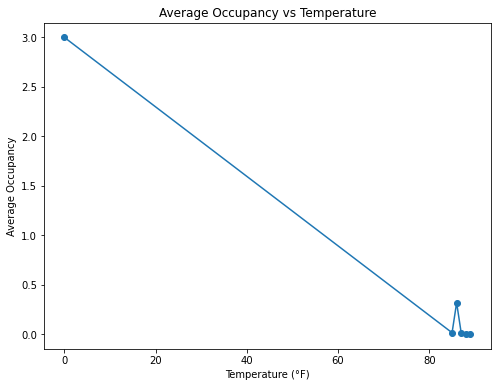

In [158]:
temp_occ = df2.groupby("Temperature_F")["Label"].mean()

plt.figure(figsize=(8,6))
plt.plot(temp_occ.index, temp_occ.values, marker="o", linestyle="-")
plt.xlabel("Temperature (°F)")
plt.ylabel("Average Occupancy")
plt.title("Average Occupancy vs Temperature")
plt.show()


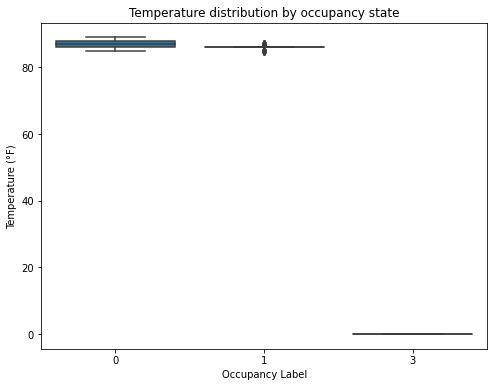

In [159]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x="Label", y="Temperature_F", data=df2)
plt.xlabel("Occupancy Label")
plt.ylabel("Temperature (°F)")
plt.title("Temperature distribution by occupancy state")
plt.show()


/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/2375442067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


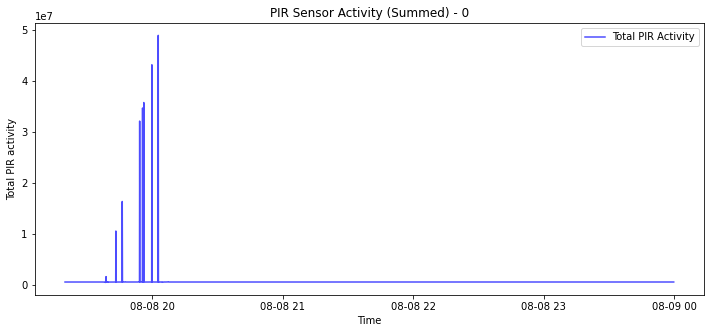

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/2375442067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


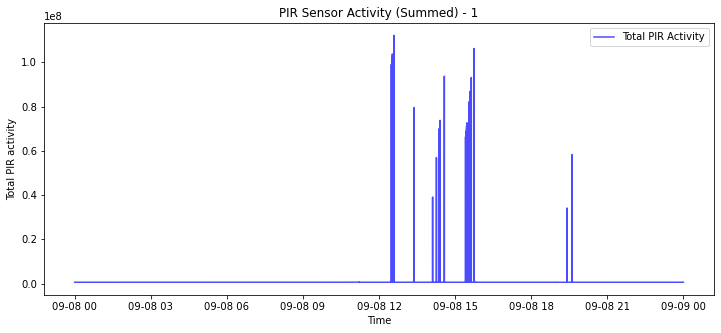

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/2375442067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


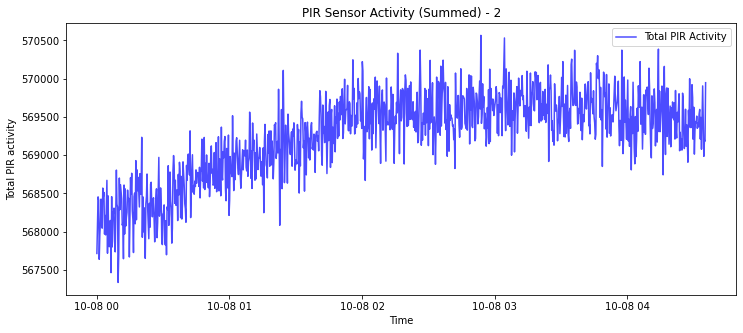

In [160]:


pir_cols = [col for col in df2.columns if "PIR_" in col]

for name, block in blocks.items():
    # 1. Sum across all PIRs
    block["PIR_total"] = block[pir_cols].sum(axis=1)

    plt.figure(figsize=(12,5))
    plt.plot(block.index, block["PIR_total"], label="Total PIR Activity", color="blue", alpha=0.7)
    plt.xlabel("Time")
    plt.ylabel("Total PIR activity")
    plt.title(f"PIR Sensor Activity (Summed) - {name}")
    plt.legend()
    plt.show()

   


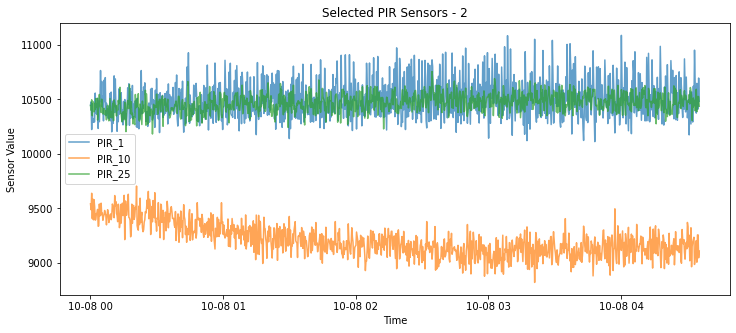

In [161]:
# 2. Example: Selected PIRs
plt.figure(figsize=(12,5))
plt.plot(block.index, block["PIR_1"], label="PIR_1", alpha=0.7)
plt.plot(block.index, block["PIR_10"], label="PIR_10", alpha=0.7)
plt.plot(block.index, block["PIR_25"], label="PIR_25", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.title(f"Selected PIR Sensors - {name}")
plt.legend()
plt.show()

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3236268795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


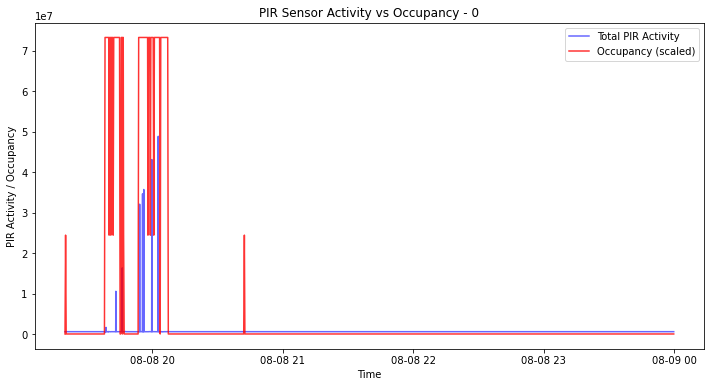

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3236268795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


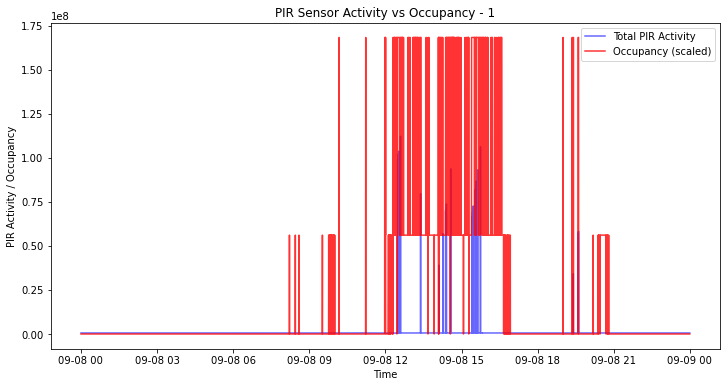

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3236268795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


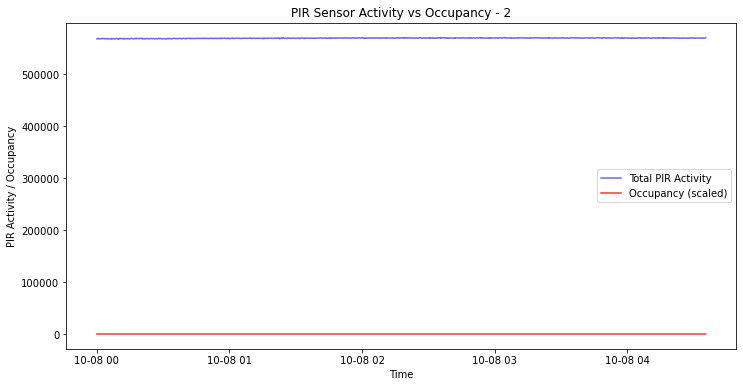

In [162]:


pir_cols = [col for col in df2.columns if "PIR_" in col]

for name, block in blocks.items():
    # Total PIR activity (sum across all sensors)
    block["PIR_total"] = block[pir_cols].sum(axis=1)

    plt.figure(figsize=(12,6))

    # Plot PIR activity (scaled for visibility)
    plt.plot(block.index, block["PIR_total"], label="Total PIR Activity", color="blue", alpha=0.6)

    # Overlay Occupancy (scale so it’s visible on the same plot)
    plt.plot(block.index, block["Label"] * block["PIR_total"].max() * 0.5, 
             label="Occupancy (scaled)", color="red", alpha=0.8)

    plt.xlabel("Time")
    plt.ylabel("PIR Activity / Occupancy")
    plt.title(f"PIR Sensor Activity vs Occupancy - {name}")
    plt.legend()
    plt.show()


/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3239390802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour


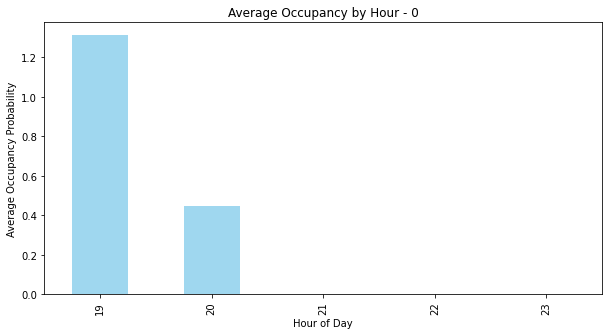

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3239390802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour


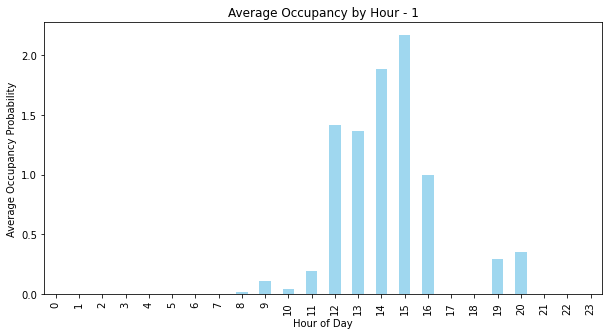

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3239390802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour


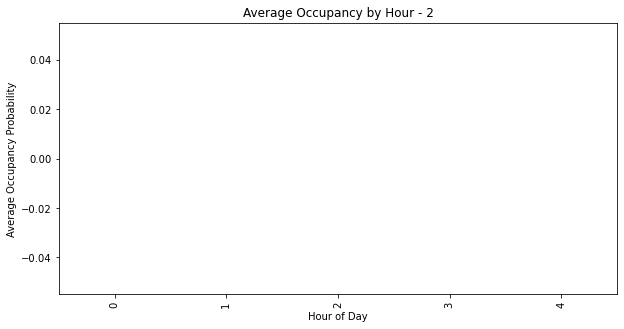

In [163]:
for name, block in blocks.items():
    # extract hour of day
    block["hour"] = block.index.hour
    
    # average occupancy probability per hour
    hourly_profile = block.groupby("hour")["Label"].mean()

    plt.figure(figsize=(10,5))
    hourly_profile.plot(kind="bar", color="skyblue", alpha=0.8)
    plt.ylabel("Average Occupancy Probability")
    plt.xlabel("Hour of Day")
    plt.title(f"Average Occupancy by Hour - {name}")
    plt.show()


/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/1729983021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour
/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/1729983021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["day"] = block.index.date


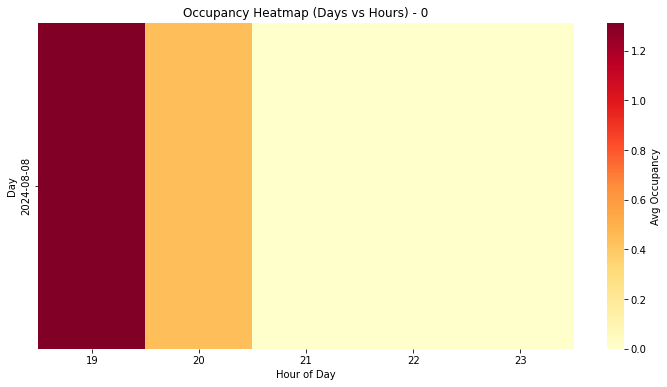

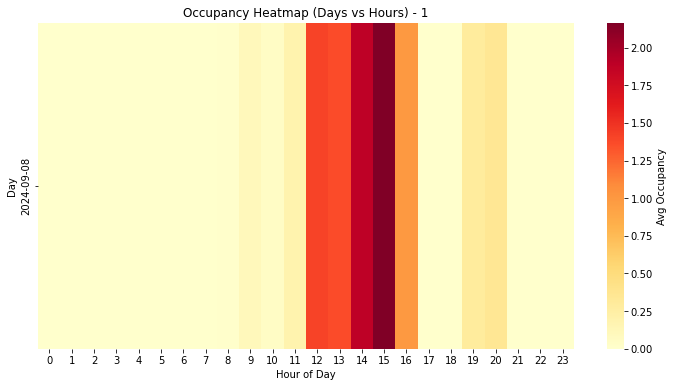

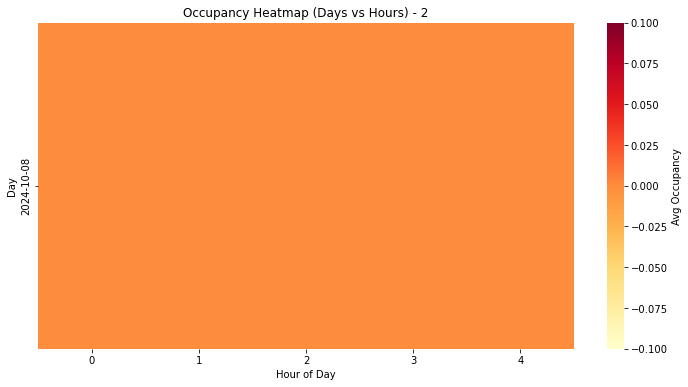

In [164]:
import seaborn as sns

for name, block in blocks.items():
    block["hour"] = block.index.hour
    block["day"] = block.index.date
    
    # pivot table (rows = day, cols = hour)
    heatmap_data = block.pivot_table(values="Label", index="day", columns="hour", aggfunc="mean")

    plt.figure(figsize=(12,6))
    sns.heatmap(heatmap_data, cmap="YlOrRd", cbar_kws={'label': 'Avg Occupancy'})
    plt.title(f"Occupancy Heatmap (Days vs Hours) - {name}")
    plt.ylabel("Day")
    plt.xlabel("Hour of Day")
    plt.show()

    

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/1534998062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour
/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/1534998062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["weekday"] = block.index.dayofweek  # 0=Mon, 6=Sun


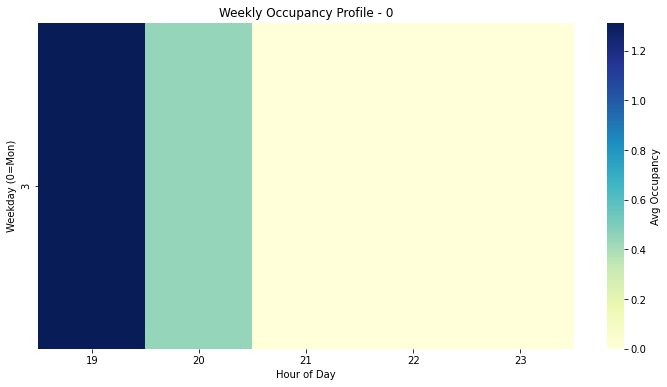

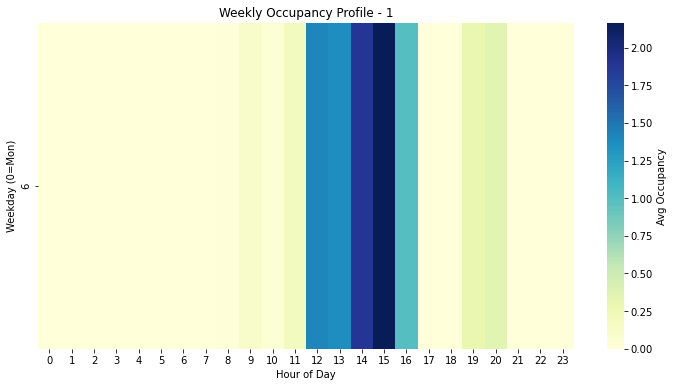

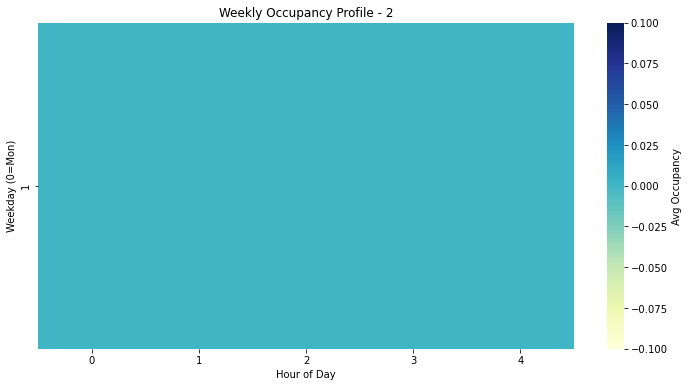

In [165]:
for name, block in blocks.items():
    block["hour"] = block.index.hour
    block["weekday"] = block.index.dayofweek  # 0=Mon, 6=Sun
    
    weekly_profile = block.groupby(["weekday", "hour"])["Label"].mean().unstack()

    plt.figure(figsize=(12,6))
    sns.heatmap(weekly_profile, cmap="YlGnBu", cbar_kws={'label': 'Avg Occupancy'})
    plt.title(f"Weekly Occupancy Profile - {name}")
    plt.ylabel("Weekday (0=Mon)")
    plt.xlabel("Hour of Day")
    plt.show()


# 1. Time Series Forecasting (ARIMA)

In [166]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [192]:
block0 = block0.copy()   # Aug 8
block1 = block1.copy()   # Sep 8
block2 = block2.copy()   # Oct 8 (we'll keep for later)

# Aug 8
occ_aug = block0["Label"].resample("5T").mean().fillna(0)

# Sep 8
occ_sep = block1["Label"].resample("5T").mean().fillna(0)

# Oct 8
occ_oct = block2["Label"].resample("5T").mean().fillna(0)




In [206]:



train = occ_aug
test = occ_sep

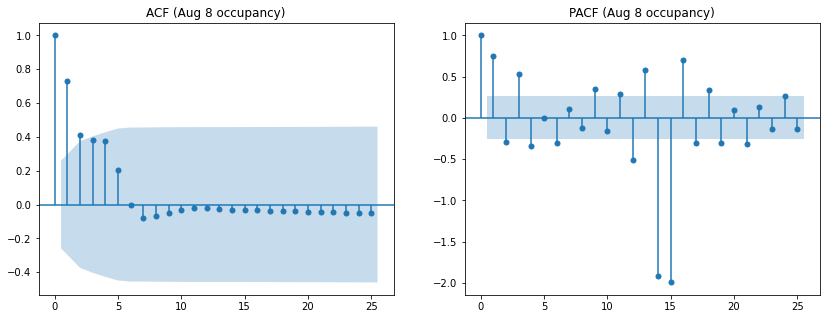

In [207]:


fig, ax = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(y_train, lags=25, ax=ax[0])
ax[0].set_title("ACF (Aug 8 occupancy)")

plot_pacf(y_train, lags=25, ax=ax[1])
ax[1].set_title("PACF (Aug 8 occupancy)")

plt.show()

In [208]:
PACF cut-off at lag 1  -> AR(1).
ACF tails off smoothly -> an ARIMA(1,0,0) or ARIMA(1,1,0).

SyntaxError: invalid syntax (1315761170.py, line 1)

# Build Model

In [209]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import pandas as pd

candidates = [(1,1,0), (0,1,1), (1,1,1), (2,1,0), (0,1,2)]
results = []

for order in candidates:
    try:
        model = ARIMA(y_train, order=order)
        fit = model.fit()
        # Forecast same number of steps as test
        fc = fit.forecast(steps=len(y_test))
        mae = mean_absolute_error(y_test, fc)
        results.append({
            "order": order,
            "aic": fit.aic,
            "bic": fit.bic,
            "mae": mae
        })
        print(f"Fitted ARIMA{order}: AIC={fit.aic:.2f}, BIC={fit.bic:.2f}, MAE={mae:.4f}")
    except Exception as e:
        print("Failed for", order, "->", e)

res_df = pd.DataFrame(results).sort_values("mae")
print("\nSummary (sorted by MAE):\n", res_df)


Fitted ARIMA(1, 1, 0): AIC=86.46, BIC=90.51, MAE=0.3511
Fitted ARIMA(0, 1, 1): AIC=78.37, BIC=82.43, MAE=0.3511
Fitted ARIMA(1, 1, 1): AIC=74.94, BIC=81.02, MAE=0.3515
Fitted ARIMA(2, 1, 0): AIC=66.87, BIC=72.94, MAE=0.3511
Fitted ARIMA(0, 1, 2): AIC=66.98, BIC=73.06, MAE=0.3513

Summary (sorted by MAE):
        order        aic        bic       mae
0  (1, 1, 0)  86.461516  90.512220  0.351112
3  (2, 1, 0)  66.867000  72.943055  0.351112
1  (0, 1, 1)  78.374307  82.425011  0.351112
4  (0, 1, 2)  66.982904  73.058960  0.351278
2  (1, 1, 1)  74.944083  81.020138  0.351524


In [ ]:
NOTE: The two best by AIC/BIC are:

        ARIMA(2,1,0) → AIC = 66.87, BIC = 72.94

        ARIMA(0,1,2) → AIC = 66.98, BIC = 73.06

        They’re essentially tied, but (2,1,0) has the absolute lowest AIC/BIC.

        Implication

        Even though (1,1,0) or (0,1,1) are simpler, the information criteria strongly prefer ARIMA(2,1,0) (a pure AR(2) with differencing).

        So the process looks like it has a short autoregressive memory (lag 1–2), no real MA component, and requires one difference (d=1).

                               SARIMAX Results                                
Dep. Variable:                  Label   No. Observations:                   57
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -30.434
Date:                Wed, 03 Sep 2025   AIC                             66.867
Time:                        17:46:10   BIC                             72.943
Sample:                    08-08-2024   HQIC                            69.223
                         - 08-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1611      0.052      3.096      0.002       0.059       0.263
ar.L2         -0.5547      0.056     -9.839      0.000      -0.665      -0.444
sigma2         0.1713      0.017     10.331      0.0

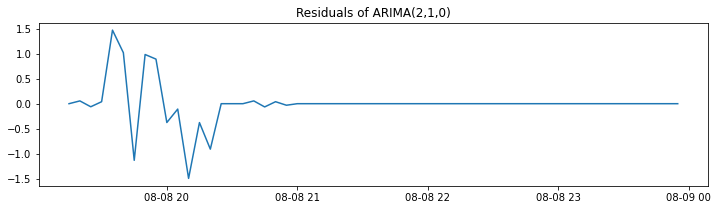

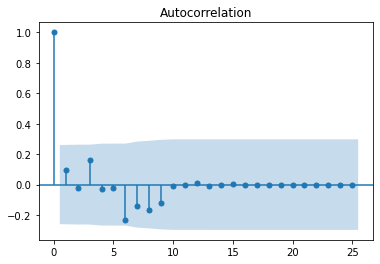

      lb_stat  lb_pvalue
10  10.284436   0.415903
15  10.296246   0.800703
20  10.297509   0.962451


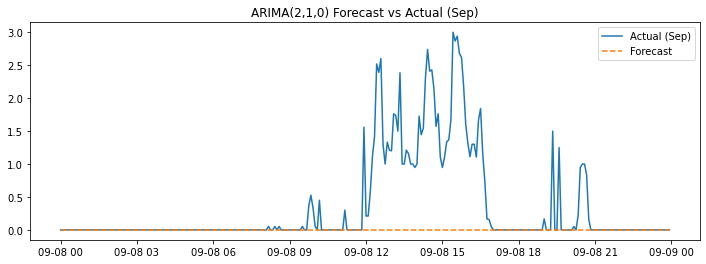

In [210]:
best_model = ARIMA(train, order=(2,1,0)).fit()
print(best_model.summary())

# Residuals
resid = best_model.resid

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

plt.figure(figsize=(12,3))
plt.plot(resid)
plt.title("Residuals of ARIMA(2,1,0)")
plt.show()

plot_acf(resid, lags=25)
plt.show()

# Ljung-Box test
lb = acorr_ljungbox(resid, lags=[10,15,20], return_df=True)
print(lb)

# Forecast vs actual
fc = best_model.forecast(steps=len(test))

plt.figure(figsize=(12,4))
plt.plot(y_test.index, y_test, label="Actual (Sep)")
plt.plot(y_test.index, fc, label="Forecast", linestyle="--")
plt.legend()
plt.title("ARIMA(2,1,0) Forecast vs Actual (Sep)")
plt.show()


In [ ]:
'''Model Behavior

AR(1) = +0.16 (significant):
A small positive correlation with the previous time step → if occupancy increased at t–1, it slightly continues upward.

AR(2) = –0.55 (strong, significant):
A strong negative correlation with the state two steps ago → occupancy tends to reverse after 2 lags (kind of an up–down oscillation).

σ² = 0.17:
The leftover noise variance. Since your labels are discrete (0,1,3), it’s expected to be non-normal.'''

In [ ]:
'''Diagnostics

    Ljung–Box p=0.46 → residuals look like white noise (great ✔️).

    JB test p≈0.00 → residuals are not Gaussian (expected because occupancy is categorical, not continuous).

    Kurtosis = 8.9 → very spiky residuals (heavy tails, bursts of activity).

    Heteroskedasticity p=0.00 → variance changes over time (again, consistent with real-world activity patterns).'''

In [ ]:
'''The Focast vs real: 
    ARIMA is technically working, but it’s not well-suited to categorical occupancy labels —
    it smooths everything toward the mean (≈0).'''

In [ ]:
''''Conclusion on ARIMA

Model fit:

    ARIMA(2,1,0) gave the best AIC/BIC.

    Coefficients were significant, residuals passed the white-noise check.

    So, statistically, the fit is valid.

Forecasting performance:

    On Sep block, forecasts collapsed to ≈0.

    This happened because ARIMA works best for continuous, stationary signals.

    The occupancy labels are categorical and imbalanced (mostly 0, with rare 1/3 spikes).

    The model learns “majority is 0 → safest forecast is flat 0.”

Interpretation:

    ARIMA explains some short-term autocorrelation (lag 1 and lag 2 matter).

    But it cannot capture bursty categorical events or daily structure with so little data.
    
    '''''

In [ ]:
Bottom line

ARIMA is not a good forecasting tool for your occupancy labels.

It’s useful as a benchmark and to understand short-memory patterns.

But for meaningful prediction, we should switch to a classification approach (occupied vs not occupied) or possibly probabilistic models.

In [ ]:
#TRYING OUT SARIMA MODEL

Fitting SARIMA(1, 1, 0) x (1, 0, 1, 288) ...
  done: AIC=8.00, BIC=nan, MAE=0.3511
Fitting SARIMA(1, 1, 0) x (0, 0, 1, 288) ...
  done: AIC=6.00, BIC=nan, MAE=0.3511
Fitting SARIMA(0, 1, 1) x (1, 0, 1, 288) ...
  done: AIC=8.00, BIC=nan, MAE=0.3511
Fitting SARIMA(1, 1, 1) x (1, 0, 1, 288) ...
  done: AIC=10.00, BIC=nan, MAE=0.3511
Fitting SARIMA(2, 1, 0) x (1, 0, 0, 288) ...
  done: AIC=8.00, BIC=nan, MAE=0.3511

Summary (sorted by MAE):
       order  seasonal_order   aic  bic       mae
0  (1, 1, 0)  (1, 0, 1, 288)   8.0  NaN  0.351112
1  (1, 1, 0)  (0, 0, 1, 288)   6.0  NaN  0.351112
2  (0, 1, 1)  (1, 0, 1, 288)   8.0  NaN  0.351112
3  (1, 1, 1)  (1, 0, 1, 288)  10.0  NaN  0.351112
4  (2, 1, 0)  (1, 0, 0, 288)   8.0  NaN  0.351112

Best model by MAE: (1, 1, 0) (1, 0, 1, 288)
                                       SARIMAX Results                                       
Dep. Variable:                                 Label   No. Observations:                   57
Model:             SARIMA

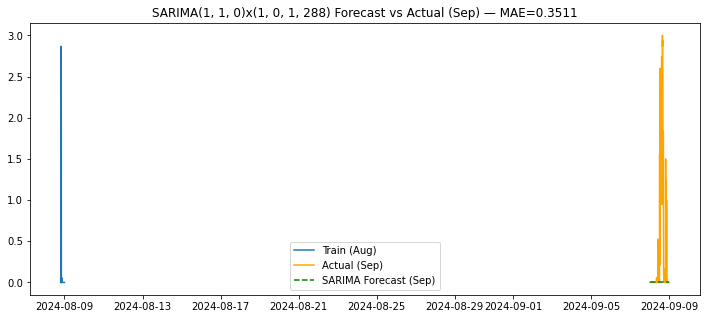

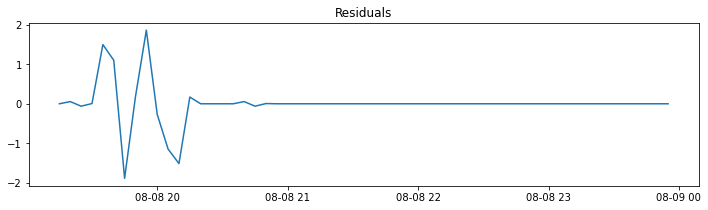

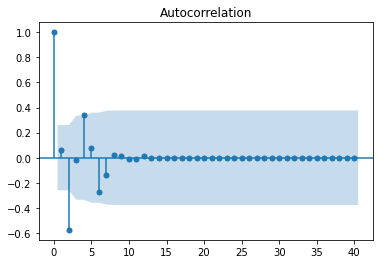

Ljung-Box (resid):
      lb_stat  lb_pvalue
10  34.586005   0.000147
15  34.603748   0.002799
20  34.603773   0.022319
MAE on Oct (stress test): 0.0000


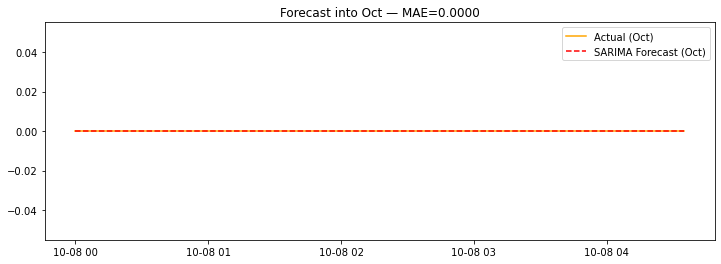

In [213]:
# Required imports
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX


# --- Assumes occ_aug_ffill, occ_sep_ffill, occ_oct_ffill exist (5-min resampled series) ---
train = occ_aug  # Aug (train)
test  = occ_sep   # Sep (test)
oct_day = occ_oct # Oct (stress test)

# seasonal period: 5-min bins * 288 = 1 day
s = 288

# Candidate SARIMA models -- keep them small because of limited data
candidates = [
    # (order, seasonal_order)
    ((1,1,0), (1,0,1,s)),
    ((1,1,0), (0,0,1,s)),
    ((0,1,1), (1,0,1,s)),
    ((1,1,1), (1,0,1,s)),
    ((2,1,0), (1,0,0,s)),
]

results = []
fits = {}

for order, seas in candidates:
    try:
        print(f"Fitting SARIMA{order} x {seas} ...")
        mod = SARIMAX(train, order=order, seasonal_order=seas,
                      enforce_stationarity=False, enforce_invertibility=False)
        res = mod.fit(disp=False, maxiter=200)
        
        # Forecast same length as test
        fc_test = res.forecast(steps=len(test))
        mae = mean_absolute_error(test, fc_test)
        results.append({
            "order": order,
            "seasonal_order": seas,
            "aic": res.aic,
            "bic": res.bic,
            "mae": mae
        })
        fits[(order, seas)] = res
        print(f"  done: AIC={res.aic:.2f}, BIC={res.bic:.2f}, MAE={mae:.4f}")
    except Exception as e:
        print("  failed:", e)

res_df = pd.DataFrame(results).sort_values("mae")
print("\nSummary (sorted by MAE):")
print(res_df)

# If none fitted, stop
if res_df.shape[0] == 0:
    raise SystemExit("No SARIMA model fitted successfully.")

# Choose best by MAE (or inspect AIC/BIC)
best_row = res_df.iloc[0]
best_order = tuple(best_row["order"])
best_seasonal = tuple(best_row["seasonal_order"])
best_fit = fits[(best_order, best_seasonal)]

print("\nBest model by MAE:", best_order, best_seasonal)
print(best_fit.summary())

# Forecast vs actual (Sep)
fc = best_fit.forecast(steps=len(test))

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train (Aug)")
plt.plot(test.index, test, label="Actual (Sep)", color="orange")
plt.plot(test.index, fc, label="SARIMA Forecast (Sep)", color="green", linestyle="--")
plt.legend()
plt.title(f"SARIMA{best_order}x{best_seasonal} Forecast vs Actual (Sep) — MAE={best_row['mae']:.4f}")
plt.show()

# Residual diagnostics
resid = best_fit.resid
plt.figure(figsize=(12,3)); plt.plot(resid); plt.title("Residuals"); plt.show()
plot_acf(resid, lags=40); plt.show()

from statsmodels.stats.diagnostic import acorr_ljungbox
print("Ljung-Box (resid):")
print(acorr_ljungbox(resid, lags=[10,15,20], return_df=True))

# Stress-test: forecast into Oct
fc_oct = best_fit.forecast(steps=len(oct_day))
mae_oct = mean_absolute_error(oct_day, fc_oct)
print(f"MAE on Oct (stress test): {mae_oct:.4f}")

plt.figure(figsize=(12,4))
plt.plot(oct_day.index, oct_day, label="Actual (Oct)", color="orange")
plt.plot(oct_day.index, fc_oct, label="SARIMA Forecast (Oct)", color="red", linestyle="--")
plt.legend(); plt.title(f"Forecast into Oct — MAE={mae_oct:.4f}")
plt.show()



In [ ]:
Conclusion

SARIMA is not providing any real advantage over plain ARIMA here:

Seasonal parameters can’t be estimated with only 1 day per block.

Occupancy labels are categorical/binary/bursty — continuous ARIMA/SARIMA struggles with this type of data.

The model essentially “shrinks to ARIMA” with flat predictions.

# 2. Classification Modelling

# a). Logistic Regression

In [ ]:
#Create the binary label

In [214]:
#  copy to avoid warnings
df_binary = df2.copy()

# Map Label into binary: 0 stays 0, 1 and 3 become 1
df_binary["occupied"] = df_binary["Label"].apply(lambda x: 1 if x in [1, 3] else 0)

# Check distribution
print(df_binary["occupied"].value_counts())


0    6247
1    1404
Name: occupied, dtype: int64


In [215]:
block0 = df_binary[df_binary["block_id"] == 0]   # Aug
block1 = df_binary[df_binary["block_id"] == 1]   # Sep
block2 = df_binary[df_binary["block_id"] == 2]   # Oct


In [227]:
train_df = pd.concat([block0, block1])
test_df_oct = block2


In [229]:
print(train_df.isna().sum().sum())   # total number of NaNs
print(train_df.isna().sum().sort_values(ascending=False).head(10))  # top 10 columns with NaNs


0
Date      0
PIR_28    0
PIR_30    0
PIR_31    0
PIR_32    0
PIR_33    0
PIR_34    0
PIR_35    0
PIR_36    0
PIR_37    0
dtype: int64


In [230]:
print("Train class balance:")
print(train_df["occupied"].value_counts(normalize=True))

print("\nTest class balance:")
print(train_df["occupied"].value_counts(normalize=True))


Train class balance:
0    0.787851
1    0.212149
Name: occupied, dtype: float64

Test class balance:
0    0.787851
1    0.212149
Name: occupied, dtype: float64


In [ ]:
#imbalance issue

In [231]:
from sklearn.model_selection import train_test_split

# Features (exclude Label)
X = train_df.drop(columns=["Label", "occupied"])
y = train_df["occupied"]

# Oct block separately (stress test later)
X_oct = test_df_oct.drop(columns=["Label", "occupied"])
y_oct = test_df_oct["occupied"]



In [240]:
X = train_df.drop(columns=["Label", "occupied", "Date", "Time"])
X_oct = test_df_oct.drop(columns=["Label", "occupied", "Date", "Time"])


In [241]:
split_index = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [ ]:
#Train

In [242]:
# Logistic Regression with class weights
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

# Evaluation

Confusion Matrix:
 [[1161   61]
 [  12   90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1222
           1       0.60      0.88      0.71       102

    accuracy                           0.94      1324
   macro avg       0.79      0.92      0.84      1324
weighted avg       0.96      0.94      0.95      1324

ROC-AUC: 0.909261576971214


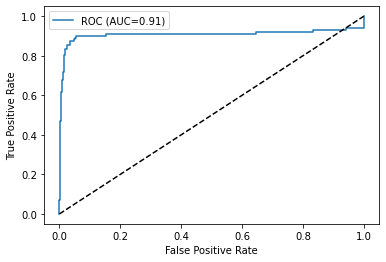

In [247]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]



print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
Conclusion for the Logistic Regression Model

    Overall accuracy: ~94% (very strong).

    ROC-AUC: ~0.91 (excellent discriminative ability).

    Recall (occupied = 1): ~88% → the model is very good at detecting when the space is actually occupied.

    Precision (occupied = 1): ~60% → the model raises more “false alarms” (predicts occupied when it isn’t).

    Confusion matrix confirms:

    Only 12 missed occupied instances (good ✅).

    61 false alarms of occupancy (room for improvement ⚠️).

Takeaways

Strengths:

    Rarely misses real occupancy → good for applications where missing occupancy is costly (comfort, security).

    Balanced class-weight helped overcome the imbalance in training data.

Weaknesses:

    Lower precision means the system sometimes predicts occupancy unnecessarily → 
    could waste energy (e.g., lights/HVAC turned on when no one’s there).

In [248]:
#Tuning

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict probabilities instead of hard labels
y_proba = model.predict_proba(X_test)[:, 1]

# Try different thresholds
thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    
    print(f"\nThreshold = {t}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_t))
    print("Precision:", precision_score(y_test, y_pred_t))
    print("Recall:", recall_score(y_test, y_pred_t))
    print("F1-score:", f1_score(y_test, y_pred_t))



Threshold = 0.3
Confusion Matrix:
 [[1062  160]
 [  10   92]]
Precision: 0.36507936507936506
Recall: 0.9019607843137255
F1-score: 0.5197740112994351

Threshold = 0.5
Confusion Matrix:
 [[1161   61]
 [  12   90]]
Precision: 0.5960264900662252
Recall: 0.8823529411764706
F1-score: 0.7114624505928855

Threshold = 0.7
Confusion Matrix:
 [[1202   20]
 [  24   78]]
Precision: 0.7959183673469388
Recall: 0.7647058823529411
F1-score: 0.7799999999999999


In [ ]:
Conclusion so far:

    The logistic regression model is flexible.

    By tuning the threshold, we can shift between:

    High recall (safety/comfort focus) at 0.3

    Balanced at 0.5

    High precision (energy-saving focus) at 0.7

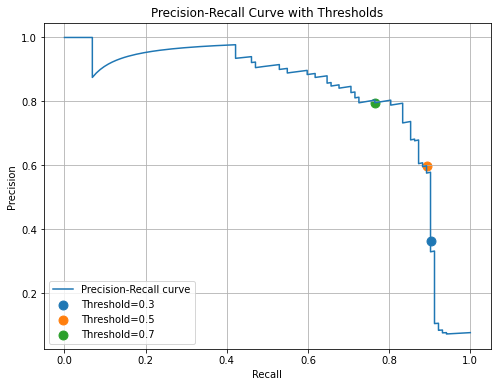

In [250]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(recalls, precisions, label="Precision-Recall curve")

# Mark some key thresholds
for t in [0.3, 0.5, 0.7]:
    # Find the closest threshold index
    idx = (np.abs(thresholds - t)).argmin()
    plt.scatter(recalls[idx], precisions[idx], marker="o", s=80,
                label=f"Threshold={t}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Thresholds")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
Rule of thumb:

    If missing an occupied event is very costly (e.g., safety monitoring) → prioritize recall (lower threshold).

    If false alarms are costly (e.g., energy management turning lights on/off unnecessarily) → prioritize precision (higher threshold).

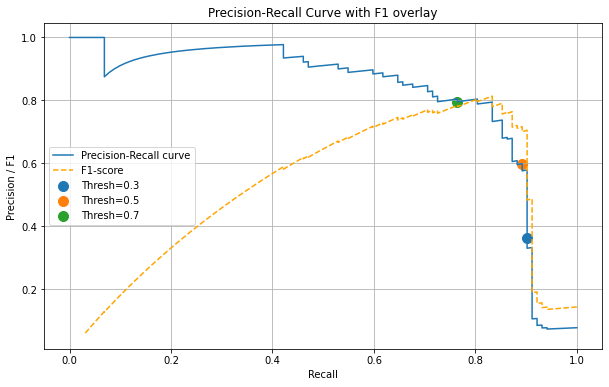

In [252]:


# Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1-score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

plt.figure(figsize=(10,6))

# Plot PR curve
plt.plot(recalls, precisions, label="Precision-Recall curve")

# Plot F1-score vs thresholds
plt.plot(recalls[:-1], f1_scores[:-1], "--", color="orange", label="F1-score")

# Mark some key thresholds
for t in [0.3, 0.5, 0.7]:
    idx = (np.abs(thresholds - t)).argmin()
    plt.scatter(recalls[idx], precisions[idx], s=100, marker="o", label=f"Thresh={t}")

plt.xlabel("Recall")
plt.ylabel("Precision / F1")
plt.title("Precision-Recall Curve with F1 overlay")
plt.legend()
plt.grid(True)
plt.show()


# b) Decision Tree Classifier

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train a Decision Tree
tree = DecisionTreeClassifier(
    class_weight="balanced",   # handle class imbalance
    random_state=42,           # reproducibility
    max_depth=5                # limit depth to reduce overfitting (tune later)
)
tree.fit(X_train, y_train)

# Predictions
y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

roc_auc = roc_auc_score(y_test, y_proba_tree)
print("ROC-AUC:", roc_auc)


Confusion Matrix:
[[1201   21]
 [   3   99]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1222
           1       0.82      0.97      0.89       102

    accuracy                           0.98      1324
   macro avg       0.91      0.98      0.94      1324
weighted avg       0.98      0.98      0.98      1324

ROC-AUC: 0.9677441352973267


In [ ]:
The Decision Tree is:

    Much better at catching occupied states (recall = 0.97).

    Way fewer false negatives (missed occupancies).

    Slightly more false positives than Logistic Regression, but overall trade-off is excellent.

# c) Random Forest

In [254]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# --- Random Forest ---
rf = RandomForestClassifier(
    n_estimators=200,          # number of trees
    max_depth=10,              # limit tree depth (tune later)
    class_weight="balanced",   # handle imbalance
    random_state=42,
    n_jobs=-1                  # use all CPU cores
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))




=== Random Forest ===
Confusion Matrix:
[[1219    3]
 [   1  101]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       0.97      0.99      0.98       102

    accuracy                           1.00      1324
   macro avg       0.99      0.99      0.99      1324
weighted avg       1.00      1.00      1.00      1324

ROC-AUC: 0.9998315201694425


In [ ]:
    Precision (class 1 = occupied): 0.97 → Almost all predicted occupancies are truly occupied.

    Recall (class 1): 0.99 → The model catches nearly all actual occupied cases.

    F1-score (class 1): 0.98 → Great balance between precision & recall.

    ROC-AUC = 0.9998 → Practically perfect separation between classes.

Conclusion:
    Random Forest is performing exceptionally well on the data. 
    The classes are well separated, and imbalance isn’t an issue anymore.

# d) Gradient Boosting 

In [255]:
# --- Gradient Boosting ---
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,       # smaller depth (boosting prefers shallow trees)
    random_state=42
)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

print("\n=== Gradient Boosting ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))



=== Gradient Boosting ===
Confusion Matrix:
[[1217    5]
 [   5   97]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       0.95      0.95      0.95       102

    accuracy                           0.99      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.99      0.99      0.99      1324

ROC-AUC: 0.9995346747536985


In [ ]:
    Precision (class 1 = occupied): 0.95 → Most predicted occupancies are true, but slightly lower than RF.

    Recall (class 1): 0.95 → Catches 95% of actual occupied cases (RF was 99%).

    F1-score (class 1): 0.95 → Strong balance, but RF had 0.98.

    ROC-AUC = 0.9995 → Still almost perfect.

Conclusion:

    Both Random Forest and Gradient Boosting are outstanding.

    Random Forest edges out slightly in recall and F1-score (better at catching all occupied cases).

    Gradient Boosting is still excellent, more compact, and sometimes more interpretable (especially with SHAP values).

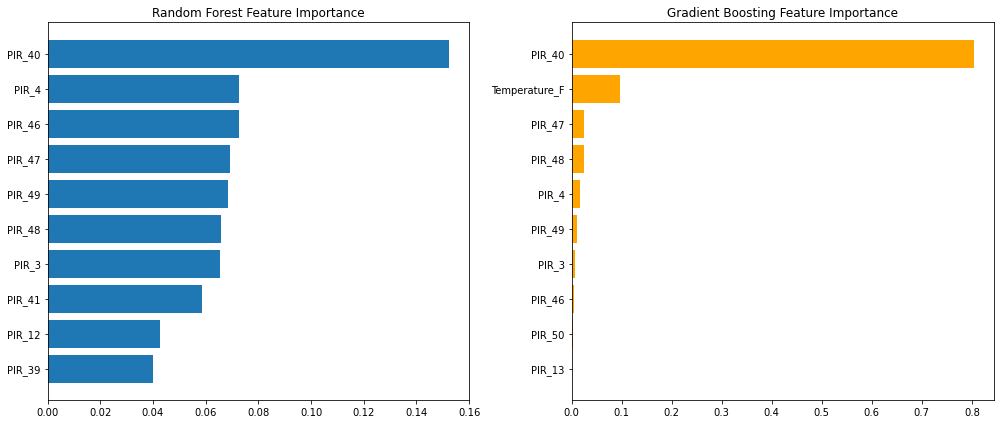

In [258]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
rf_importances = rf.feature_importances_
gb_importances = gb.feature_importances_

# Put into DataFrames for easy comparison
rf_df = pd.DataFrame({"feature": X_train.columns, "importance": rf_importances})
gb_df = pd.DataFrame({"feature": X_train.columns, "importance": gb_importances})

# Sort by importance
rf_df = rf_df.sort_values("importance", ascending=False).head(10)  # top 10
gb_df = gb_df.sort_values("importance", ascending=False).head(10)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest
axes[0].barh(rf_df["feature"], rf_df["importance"])
axes[0].set_title("Random Forest Feature Importance")
axes[0].invert_yaxis()

# Gradient Boosting
axes[1].barh(gb_df["feature"], gb_df["importance"], color="orange")
axes[1].set_title("Gradient Boosting Feature Importance")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

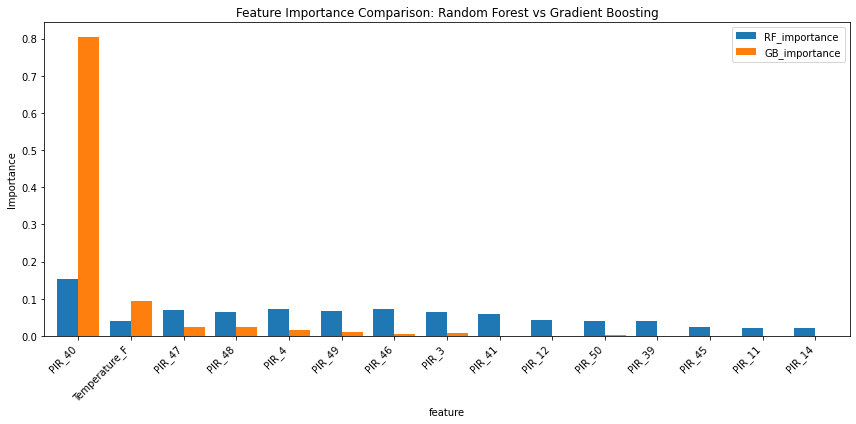

In [260]:
import seaborn as sns

# Combine RF and GB importances into one DataFrame
rf_df = pd.DataFrame({"feature": X_train.columns, "RF_importance": rf.feature_importances_})
gb_df = pd.DataFrame({"feature": X_train.columns, "GB_importance": gb.feature_importances_})

# Merge on feature
importance_df = rf_df.merge(gb_df, on="feature")

# Take average importance to sort
importance_df["avg_importance"] = (importance_df["RF_importance"] + importance_df["GB_importance"]) / 2
importance_df = importance_df.sort_values("avg_importance", ascending=False).head(15)  # top 15

# Plot
plt.figure(figsize=(10, 6))
importance_df.plot(
    x="feature",
    y=["RF_importance", "GB_importance"],
    kind="bar",
    figsize=(12, 6),
    width=0.8
)

plt.title("Feature Importance Comparison: Random Forest vs Gradient Boosting")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
    Both models agree PIR_40 is the strongest driver (that’s your anchor feature).

    After that, they diverge a bit — which usually means the next 
    features (PIR_4 vs Temp) are somewhat interchangeable.

What it means

    PIR_40 is absolutely critical → maybe it’s the sensor closest to the main door or most sensitive.

    Temp may matter in GB because it picks up longer-term patterns (e.g., “hot afternoons = more people”), while RF is more sensor-driven.